<a href="https://www.kaggle.com/code/pablosebastintufino/cyclistic-bike-share-project?scriptVersionId=97865676" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cyclistic Bike Share Project (Python)

# Introduction
This analysis is for a Google Analytics Certificate capstone project. 

A company called Cyclistic developed a successful bike-share program in 2016. Since then, the initiative has grown to include a fleet of 5,824 bicycles that are geotracked and locked into 692 stations throughout Chicago.

Until date, Cyclistic’s marketing strategy has focused on building general awareness and appealing to a wide range of consumers. “Casual” riders are customers who purchase single-ride or full-day passes. Cyclistic “members” are customers who purchase annual memberships.

Annual members are substantially more profitable than casual riders, according to Cyclistic’s financial analysts. The company’s future prosperity, according to the director of marketing, hinges on increasing the number of yearly subscribers.

There are 3 pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as Casual riders. Customers who purchase annual memberships are Cyclistic members.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

# 2. Ask
**Defining the problem**

As Cyclistic realized that having more annual customers than casual riders will improve their earnings. They want to reach out to their “casual” riders, to convince them to switch to an annual subscription. In order to do so, they must first determine how the “casual” and “annual” customers differ in order to create a targeted and effective marketing message for the “casual” customers.

**Business Task**

The business task is to identify the differences between casual and annual riders in order to come up with a proper message to campaign to the casual users convincing them to switch to annual subscription. Hence, the question to be answered is:

How do annual members and casual riders use Cyclistic bikes differently?
Key Stakeholders

**Cyclistic executive team**
* My manager, Lily Moreno
* Director of marketing
* The rest of the marketing analytics team

# 3.Prepare


**Source of Data**

* Data was collected from Motivate International Inc under this license. Hence, it is public data.
Since Cyclistic is a fictional company, the datasets have different names.

**Data organization
**

* 12 csv. Files
* 13 variables

**Data credibility**

The data appears to be in good condition, and it is first-hand information, with a large number of entries and a lot of important information.

**ROCCC Analysis**

* Reliability - I think it is reliable although it is not clear if it was vetted.
* Original - Yes
* Comprehensive - I think the data is not 100% comprehensive since some information is missing although its nominal.
* Current - 12 months old
* Cited - Yes

Sort and filter the Data The data which i used was from 2021-2022. This is so because it is the most relevant period to the aforementioned business task. In addition to that, it is the period when the data is complete whereby all geo-location coordinates and bike types are included.

# 4. Process

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import cufflinks as cf

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
Jan = pd.read_csv('../input/cyclisticbikeshare/202101-divvy-tripdata.csv')
Feb = pd.read_csv('../input/cyclisticbikeshare/202102-divvy-tripdata.csv')
Mar = pd.read_csv('../input/cyclisticbikeshare/202103-divvy-tripdata.csv')
Apr = pd.read_csv('../input/cyclisticbikeshare/202104-divvy-tripdata.csv')
May = pd.read_csv('../input/cyclisticbikeshare/202105-divvy-tripdata.csv')
Jun = pd.read_csv('../input/cyclisticbikeshare/202106-divvy-tripdata.csv')
Jul = pd.read_csv('../input/cyclisticbikeshare/202107-divvy-tripdata.csv')
Aug = pd.read_csv('../input/cyclisticbikeshare/202108-divvy-tripdata.csv')
Sep = pd.read_csv('../input/cyclisticbikeshare/202109-divvy-tripdata.csv')
Oct = pd.read_csv('../input/cyclisticbikeshare/202110-divvy-tripdata.csv')
Nov = pd.read_csv('../input/cyclisticbikeshare/202111-divvy-tripdata.csv')
Dec = pd.read_csv('../input/cyclisticbikeshare/202112-divvy-tripdata.csv')


In [3]:
df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])

# Joining 12 CSV's into 1 and naming it as "df". from year 2021

df

# Top 5 & bottom 5 rows of dataframe "df".

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,1/23/2021 16:14,1/23/2021 16:24,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,DC88F20C2C55F27F,electric_bike,1/27/2021 18:43,1/27/2021 18:47,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,EC45C94683FE3F27,electric_bike,1/21/2021 22:35,1/21/2021 22:37,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,4FA453A75AE377DB,electric_bike,1/7/2021 13:31,1/7/2021 13:42,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,BE5E8EB4E7263A0B,electric_bike,1/23/2021 2:24,1/23/2021 2:24,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


# 4.1 Cleaning Process

In [4]:
df = df.drop(columns=['start_station_id', 'end_station_id'])

In [5]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,Kingsbury St & Kinzie St,41.882123,-87.640053,41.889106,-87.638862,member
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,Dearborn St & Monroe St,41.881956,-87.639955,41.880254,-87.629603,member
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,NaN,41.860000,-87.720000,41.850000,-87.710000,member
247539,37AC57E34B2E7E97,classic_bike,2021-12-13 08:45:32,2021-12-13 08:49:09,Michigan Ave & Jackson Blvd,Dearborn St & Monroe St,41.877850,-87.624080,41.881320,-87.629521,member


In [6]:
df['started_at'] = df['started_at'].astype('datetime64')
df['ended_at'] = df['ended_at'].astype('datetime64')

# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

In [7]:
df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int32')

# Creating New Column "ride_length" and changing its datatype to "int32"
# In this column, each row contains the difference between "starting time" and "ending time" columns in minutes

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,NaN,41.900341,-87.696743,41.89,-87.72,member,10
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,NaN,41.900333,-87.696707,41.90,-87.69,member,4
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,NaN,41.900313,-87.696643,41.90,-87.70,member,2
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,NaN,41.900399,-87.696662,41.92,-87.69,member,11
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:00,2021-01-23 02:24:00,California Ave & Cortez St,NaN,41.900326,-87.696697,41.90,-87.70,casual,0


In [9]:
df.sort_values(by = 'ride_length')

# Sorting Values by "ride_length" column in Ascending order.

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
56721,7CA158F5F050156E,electric_bike,2021-11-07 01:58:08,2021-11-07 01:00:06,Halsted St & Dickens Ave,NaN,41.920020,-87.648990,41.930000,-87.650000,casual,-58
142091,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,Clark St & North Ave,Larrabee St & Webster Ave,41.911738,-87.632145,41.921762,-87.644034,casual,-55
125855,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,Sedgwick St & Webster Ave,Sedgwick St & North Ave,41.922167,-87.638888,41.911386,-87.638677,member,-54
282673,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,Sheffield Ave & Wrightwood Ave,Southport Ave & Wellington Ave,41.928712,-87.653833,41.935733,-87.663576,casual,-53
260820,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,Milwaukee Ave & Wabansia Ave,Western Ave & Division St,41.912580,-87.681424,41.902906,-87.687367,member,-53
...,...,...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,Base - 2132 W Hubbard Warehouse,41.929567,-87.707857,41.889955,-87.680651,casual,49107
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,Base - 2132 W Hubbard Warehouse,41.886021,-87.630876,41.889955,-87.680651,casual,52701
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,Wells St & Polk St,41.877181,-87.627844,41.872596,-87.633502,casual,53921
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,Base - 2132 W Hubbard Warehouse,41.892278,-87.612043,41.889955,-87.680651,casual,55691


In [10]:
# Its seen that many rows in some months contained negative values. 
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.

df[df['ride_length'] < 0].count()

# Number of rows containing Negative Values.

ride_id               76
rideable_type         76
started_at            76
ended_at              76
start_station_name    62
end_station_name      55
start_lat             76
start_lng             76
end_lat               75
end_lng               75
member_casual         76
ride_length           76
dtype: int64

In [11]:
df[df['ride_length'] < 1].count()

# Number of rows containing "ride length" less than "1" minute.

ride_id               84650
rideable_type         84650
started_at            84650
ended_at              84650
start_station_name    64415
end_station_name      60595
start_lat             84650
start_lng             84650
end_lat               84617
end_lng               84617
member_casual         84650
ride_length           84650
dtype: int64

In [12]:
df = df[df['ride_length'] >= 1]
df = df.reset_index()
df = df.drop(columns=['index'])

# Removing 80845 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

df

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,NaN,41.900341,-87.696743,41.890000,-87.720000,member,10
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,NaN,41.900333,-87.696707,41.900000,-87.690000,member,4
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,NaN,41.900313,-87.696643,41.900000,-87.700000,member,2
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,NaN,41.900399,-87.696662,41.920000,-87.690000,member,11
4,5D8969F88C773979,electric_bike,2021-01-09 14:24:00,2021-01-09 15:17:00,California Ave & Cortez St,NaN,41.900409,-87.696763,41.940000,-87.710000,casual,53
...,...,...,...,...,...,...,...,...,...,...,...,...
5510408,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,19
5510409,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,Kingsbury St & Kinzie St,41.882123,-87.640053,41.889106,-87.638862,member,7
5510410,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,Dearborn St & Monroe St,41.881956,-87.639955,41.880254,-87.629603,member,8
5510411,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,NaN,41.860000,-87.720000,41.850000,-87.710000,member,14


<AxesSubplot:xlabel='member_casual', ylabel='ride_length'>

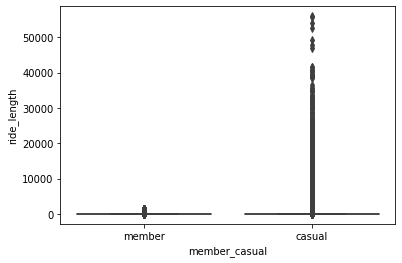

In [13]:
sns.boxplot(data = df, x ='member_casual', y = 'ride_length', order = ['member', 'casual'])

# Boxplot of column "Ride Length" to see the distribution of data between Member and Casual Rider.

In [14]:
df = df.astype({'ride_id':'string', 'rideable_type':'category'})

# Coverting datatypes of each columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510413 entries, 0 to 5510412
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       object        
 11  ride_length         int32         
dtypes: category(1), datetime64[ns](2), float64(4), int32(1), object(3), string(1)
memory usage: 446.7+ MB


In [15]:
df.shape

# Number of Rows and Columns

(5510413, 12)

In [16]:
df.isna().sum()

# Checking if Dataframe "df" contains any missing values

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    670574
end_station_name      715115
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
ride_length                0
dtype: int64

In [17]:
df['ride_id'] = df['ride_id'].str.strip()

# Removing leading and trailing whitespaces in column "Ride Id".

df[df['ride_id'].duplicated()]

# View any duplicate rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length


# 5. Analyze and Share

In [18]:
df['year'] = df['started_at'].dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = df['started_at'].dt.month_name()
df['month'] = df['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['day_of_week'] = df['started_at'].dt.day_name()
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))

df['hour'] = df['started_at'].dt.hour

df = df.astype({'year':'int16', 'hour':'int8'})

# Creating new columns "year", "month", "day_of_week", "hour" and Converting datatypes.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,NaN,41.900341,-87.696743,41.89,-87.72,member,10,2021,January,Saturday,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,NaN,41.900333,-87.696707,41.90,-87.69,member,4,2021,January,Wednesday,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,NaN,41.900313,-87.696643,41.90,-87.70,member,2,2021,January,Thursday,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:00,2021-01-07 13:42:00,California Ave & Cortez St,NaN,41.900399,-87.696662,41.92,-87.69,member,11,2021,January,Thursday,13
4,5D8969F88C773979,electric_bike,2021-01-09 14:24:00,2021-01-09 15:17:00,California Ave & Cortez St,NaN,41.900409,-87.696763,41.94,-87.71,casual,53,2021,January,Saturday,14


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510413 entries, 0 to 5510412
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       object        
 11  ride_length         int32         
 12  year                int16         
 13  month               category      
 14  day_of_week         category      
 15  hour                int8          
dtypes: category(3), datetime64[ns](2), float64(4), int16(1), int32(1), int8(1), object(3), string(1)
memory usage: 473.0+ MB


# 5.1
# Analyzing the Difference in Number of Rides Between Casual riders and Members.

# 5.1.1
# Total Number of Rides in 1 Year

In [20]:
pd.pivot_table(df,
              index = 'member_casual',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
member_casual,
casual,2495003
member,3015410
Total Count,5510413


In [21]:
fig_1 = df.groupby('member_casual', as_index=False).count()

px.bar(fig_1, x = 'member_casual', y = 'ride_id', range_y = [0,3000000],
        color = 'member_casual', 
        height = 500,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.2
# Number of Rides in Each Month

In [22]:
df_pv1 = pd.pivot_table(df,
              index = ['year', 'month', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')
df_pv1 = df_pv1.loc[(df_pv1 != 0).any(axis=1)]
df_pv1

count
                                     ride_id
year        month     member_casual         
2021        January   casual           17953
                      member           78045
            February  casual            9964
                      member           38685
            March     casual           83148
                      member          142375
            April     casual          134945
                      member          197477
            May       casual          253346
                      member          269897
            June      casual          365023
                      member          352676
            July      casual          435927
                      member          373833
            August    casual          407517
                      member          385426
            September casual          359226
                      member          385959
            October   casual          253829
                      member          367460
            November  casual          105373
                      member          248699
            December  casual           68752
                      member          174878
Total Count                          5510413

In [23]:
fig_2 = df.groupby(['year', 'month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_2, x = 'month', y = 'ride_id', range_y = [0,450000],
        color = 'member_casual', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'month': 'Months (Oct 2020 - Sep 2021)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.3
# Average Number of Rides in Each Weekday

In [24]:
pd.pivot_table(df,
              index = ['day_of_week', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
day_of_week member_casual         
Sunday      casual          474543
            member          369262
Monday      casual          282552
            member          409421
Tuesday     casual          270723
            member          458231
Wednesday   casual          275206
            member          469659
Thursday    casual          282326
            member          444521
Friday      casual          359143
            member          439065
Saturday    casual          550510
            member          425251
Total Count                5510413

In [25]:
fig_3 = df.groupby(['day_of_week', 'member_casual'], as_index=False).count()

px.line(fig_3, x = 'day_of_week', y = 'ride_id', range_y = [0,550000],
        color = 'member_casual',  
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.1.4
# Average Number of Rides in Each Hour

In [26]:
pd.pivot_table(df,
              index = ['hour', 'member_casual'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

count
                           ride_id
hour        member_casual         
0           casual           53101
            member           32487
1           casual           38661
            member           21444
2           casual           25182
            member           12190
3           casual           13875
            member            7027
4           casual            9803
            member            8007
5           casual           12358
            member           29606
6           casual           25409
            member           80662
7           casual           46155
            member          147642
8           casual           62784
            member          170713
9           casual           75193
            member          128791
10          casual          103341
            member          127122
11          casual          134134
            member          152815
12          casual          159805
            member          177657
13          casual          171078
            member          174828
14          casual          176059
            member          171619
15          casual          186079
            member          197645
16          casual          202596
            member          253348
17          casual          233553
            member          315111
18          casual          210984
            member          267064
19          casual          164055
            member          191050
20          casual          120431
            member          129226
21          casual          102396
            member           95435
22          casual           94932
            member           73225
23          casual           73039
            member           50696
Total Count                5510413

In [27]:
fig_4 = df.groupby(['hour', 'member_casual'], as_index=False).count()

fig_4a = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,400000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})
fig_4a.update_xaxes(dtick=1)
fig_4a.show()

# 5.2
# Analyzing Difference in Average Ride Length Between Casual riders and Members

# 5.2.1
# Average Ride Length in 1 Year

In [28]:
pd.pivot_table(df,
               index = 'member_casual',
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

,mean
,ride_length
member_casual,
casual,31.944722
member,13.377361
Total Ride Average,21.784285


In [29]:
fig_4 = round(df.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'ride_length', range_x = [0,35],
        color = 'member_casual', 
        height = 300,
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.2.2
# Average Ride Length in Each Month

In [30]:
pd.pivot_table(df,
               index = ['year', 'month', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                           ride_length
year               month     member_casual            
2021               January   casual          25.919345
                             member          12.982484
                   February  casual          49.699117
                             member          17.898255
                   March     casual          38.069527
                             member          13.677619
                   April     casual          37.993864
                             member          14.425999
                   May       casual          38.273622
                             member          14.402698
                   June      casual          37.199996
                             member          14.439262
                   July      casual          32.753615
                             member          13.989878
                   August    casual          28.654314
                             member          13.832834
                   September casual          27.680354
                             member          13.461233
                   October   casual          28.562847
                             member          12.226259
                   November  casual          22.971710
                             member          11.007740
                   December  casual          23.335321
                             member          10.691253
Total Ride Average                           21.784285

In [31]:
fig_5 = round(df.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2).dropna()

px.bar(fig_5, x = 'month', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'month': 'Months (Oct 2020 - Sep 2021)'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

* Average ride lenght of casual riders are more than twice than members in all months.
* It´s more than evident, that february is higher than the other months. In evidence, [(you can read this article here)](https://www.nbcchicago.com/news/local/nws-chicago-had-9th-snowiest-february-on-record-with-nearly-2-feet-of-snow/2450777/) Chicago had 9th Snowiest February on Record and snowstorm in 2021. 
* In other words, riders were not able to return bikes as usual and bikes were stuck with them in February. 


# Average Ride Length by days of the week

In [32]:
pd.pivot_table(df,
               index = ['day_of_week', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                 ride_length
day_of_week        member_casual            
Sunday             casual          37.592492
                   member          15.461550
Monday             casual          31.813999
                   member          12.982590
Tuesday            casual          27.858025
                   member          12.504617
Wednesday          casual          27.540308
                   member          12.539146
Thursday           casual          27.577053
                   member          12.493567
Friday             casual          30.272866
                   member          13.064929
Saturday           casual          34.685548
                   member          15.060254
Total Ride Average                 21.784285

In [33]:
fig_6 = round(df.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_6, x = 'day_of_week', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

* In Weekends casual riders' ride length is maximum when compared to Weekdays.
* Members' ride length tend to be almost same in all Weekdays and marginally higher in Weekends.
* Both Casual riders and Members use bikes for long rides during Weekends.

# Average Ride Length by hour of the day

In [34]:
pd.pivot_table(df,
               index = ['hour', 'member_casual'],
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

mean
                                 ride_length
hour               member_casual            
0                  casual          34.200542
                   member          13.405762
1                  casual          37.131787
                   member          14.595318
2                  casual          43.408149
                   member          15.352584
3                  casual          44.992072
                   member          16.216024
4                  casual          46.981638
                   member          13.259148
5                  casual          23.539165
                   member          11.523576
6                  casual          21.045850
                   member          11.878865
7                  casual          20.715545
                   member          12.003305
8                  casual          23.825178
                   member          11.879839
9                  casual          28.324565
                   member          12.322282
10                 casual          33.257739
                   member          13.255731
11                 casual          33.806626
                   member          13.449890
12                 casual          33.374344
                   member          13.198517
13                 casual          34.434632
                   member          13.426825
14                 casual          34.731596
                   member          13.925842
15                 casual          33.979863
                   member          13.807245
16                 casual          31.503771
                   member          13.846942
17                 casual          29.671398
                   member          14.012459
18                 casual          29.809687
                   member          13.870368
19                 casual          30.251263
                   member          13.657467
20                 casual          32.026239
                   member          13.585215
21                 casual          32.174011
                   member          13.235406
22                 casual          32.354959
                   member          13.412168
23                 casual          33.460932
                   member          13.935794
Total Ride Average                 21.784285

In [35]:
fig_7 = round(df.groupby(['hour', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_7, x = 'hour', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length', 
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'hour': 'hour of day'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# 5.3
# Analyzing Difference in Rideable Type Usage Between Casual riders and Members.

In [36]:
pd.pivot_table(df,
               index = ['rideable_type', 'member_casual'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')

count
                             ride_id
rideable_type member_casual         
classic_bike  casual         1253422
              member         1955905
docked_bike   casual          310396
              member               1
electric_bike casual          931185
              member         1059504
Total Rides                  5510413

In [37]:
fig_8 = df.groupby(['rideable_type', 'member_casual',], as_index=False).count()

px.bar(fig_8, x = 'rideable_type', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of rides', 'member_casual': 'Member/Casual', 'rideable_type': 'bikes'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# Most Popular Day of the Week for Bike Rentals

In [38]:
dw = df[['day_of_week', 'member_casual', 'ride_id']]
dw = dw.groupby(['day_of_week', 'member_casual'], as_index=False)[['ride_id']].count()

px.bar(dw, x = 'day_of_week', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of rides', 'member_casual': 'Member/Casual', 'day_of_week': 'Days of week'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'day_of_week': False}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# Most Popular Month of the Year for Bike Rentals

In [39]:
df4 = df[['month', 'member_casual', 'ride_id']]
df4 = df4.groupby(['month', 'member_casual'], as_index=False)[['ride_id']].count()

px.bar(df4, x = 'month', y = 'ride_id',
        color = 'member_casual',
        barmode='group',
        text = 'ride_id', 
        labels = {'ride_id': 'No. of rides', 'member_casual': 'Member/Casual', 'month': 'Months'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False}, 
        color_discrete_map = {'casual': '#0446c2', 'member': '#05d961'})

# Customer Type vs Station

In [40]:
top10_start = df.groupby('start_station_name')['start_station_name'].count().sort_values(ascending=False).head(10)
top10_start

start_station_name
Streeter Dr & Grand Ave     81513
Michigan Ave & Oak St       43734
Wells St & Concord Ln       43108
Millennium Park             41640
Clark St & Elm St           40720
Wells St & Elm St           37273
Theater on the Lake         36358
Kingsbury St & Kinzie St    33169
Clark St & Lincoln Ave      32983
Clark St & Armitage Ave     32475
Name: start_station_name, dtype: int64

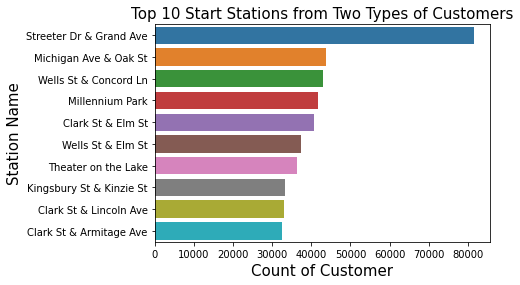

In [41]:
fig, ax = plt.subplots()

sns.barplot(data=df, y=top10_start.index, x=top10_start, ax=ax)

ax.set_title("Top 10 Start Stations from Two Types of Customers", size=15)
plt.xlabel("Count of Customer", size=15)
plt.ylabel("Station Name",size=15)

plt.show()

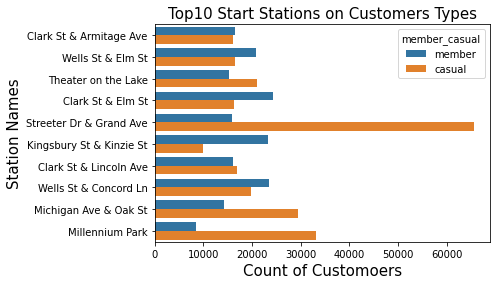

In [42]:
fig, ax = plt.subplots()

top10_start_stations = [
    "Streeter Dr & Grand Ave",
    "Michigan Ave & Oak St",
    "Wells St & Concord Ln",
    "Millennium Park",
    "Clark St & Elm St",
    "Wells St & Elm St",
    "Theater on the Lake",
    "Kingsbury St & Kinzie St",
    "Clark St & Lincoln Ave",
    "Clark St & Armitage Ave"
    ]

start_result = df[df['start_station_name'].isin(top10_start_stations)]

sns.countplot(data=start_result, y='start_station_name', hue='member_casual', ax=ax)

plt.title("Top10 Start Stations on Customers Types", size=15)
plt.xlabel("Count of Customoers", size=15)
plt.ylabel("Station Names", size=15)

plt.show()

In [43]:
casual = df[df['member_casual'] == 'casual']
casual.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
4,5D8969F88C773979,electric_bike,2021-01-09 14:24:00,2021-01-09 15:17:00,California Ave & Cortez St,NaN,41.900409,-87.696763,41.940000,-87.710000,casual,53,2021,January,Saturday,14
10,57C750326F9FDABE,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,Wood St & Augusta Blvd,41.900374,-87.696688,41.899180,-87.672178,casual,9,2021,January,Saturday,15
11,4D518C65E338D070,electric_bike,2021-01-09 15:28:00,2021-01-09 15:37:00,California Ave & Cortez St,Wood St & Augusta Blvd,41.900379,-87.696716,41.899149,-87.672177,casual,9,2021,January,Saturday,15


In [44]:
annual = df[df['member_casual'] == 'member']
annual.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:00,2021-01-23 16:24:00,California Ave & Cortez St,NaN,41.900341,-87.696743,41.89,-87.72,member,10,2021,January,Saturday,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:00,2021-01-27 18:47:00,California Ave & Cortez St,NaN,41.900333,-87.696707,41.90,-87.69,member,4,2021,January,Wednesday,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:00,2021-01-21 22:37:00,California Ave & Cortez St,NaN,41.900313,-87.696643,41.90,-87.70,member,2,2021,January,Thursday,22


In [45]:
casual_list = casual['start_station_name'].value_counts().head(10)
casual_list

Streeter Dr & Grand Ave       65564
Millennium Park               33198
Michigan Ave & Oak St         29433
Shedd Aquarium                22961
Theater on the Lake           21096
Wells St & Concord Ln         19700
Lake Shore Dr & Monroe St     19415
Clark St & Lincoln Ave        16870
Wells St & Elm St             16527
Indiana Ave & Roosevelt Rd    16446
Name: start_station_name, dtype: int64

In [46]:
annual_list = annual['start_station_name'].value_counts().head(10)
annual_list

Clark St & Elm St            24383
Wells St & Concord Ln        23408
Kingsbury St & Kinzie St     23250
Wells St & Elm St            20746
Dearborn St & Erie St        19281
Wells St & Huron St          18950
St. Clair St & Erie St       18639
Broadway & Barry Ave         17572
Clinton St & Madison St      16607
Desplaines St & Kinzie St    16605
Name: start_station_name, dtype: int64

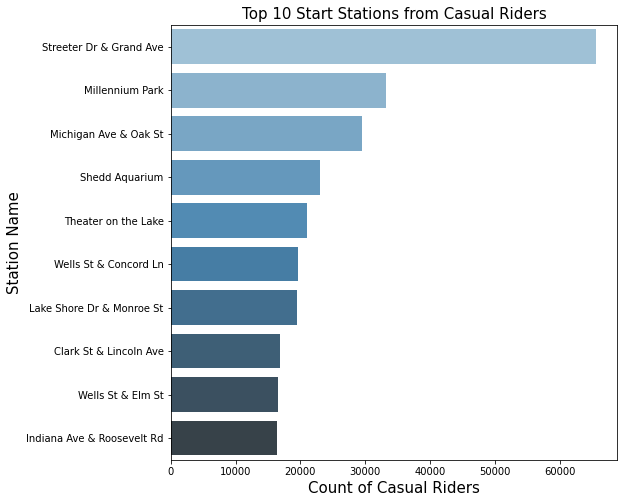

In [47]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=casual, y=casual_list.index, x=casual_list, palette='Blues_d',ax=ax)

ax.set_title('Top 10 Start Stations from Casual Riders', size=15)
plt.xlabel("Count of Casual Riders", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

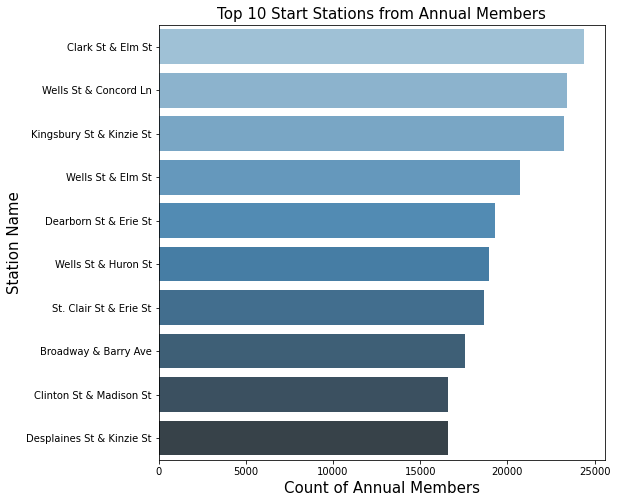

In [48]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=annual, y=annual_list.index, x=annual_list, palette='Blues_d',ax=ax)

ax.set_title('Top 10 Start Stations from Annual Members', size=15)
plt.xlabel("Count of Annual Members", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

In [49]:
top10_end = df.groupby('end_station_name')['end_station_name'].count().sort_values(ascending=False).head(10)
top10_end

end_station_name
Streeter Dr & Grand Ave     82257
Michigan Ave & Oak St       44252
Wells St & Concord Ln       43372
Millennium Park             42412
Clark St & Elm St           40056
Wells St & Elm St           36955
Theater on the Lake         36595
Clark St & Lincoln Ave      32911
Wabash Ave & Grand Ave      32721
Kingsbury St & Kinzie St    32546
Name: end_station_name, dtype: int64

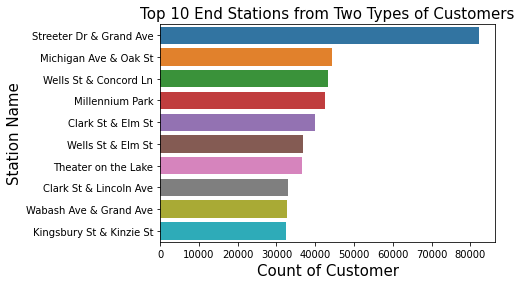

In [50]:
fig, ax = plt.subplots()

sns.barplot(data=df, y=top10_end.index, x=top10_end, ax=ax)

ax.set_title("Top 10 End Stations from Two Types of Customers", size=15)
plt.xlabel("Count of Customer", size=15)
plt.ylabel("Station Name",size=15)

plt.show()

In [51]:
top10_end_list = df['end_station_name'].value_counts().head(10)
top10_end_list

Streeter Dr & Grand Ave     82257
Michigan Ave & Oak St       44252
Wells St & Concord Ln       43372
Millennium Park             42412
Clark St & Elm St           40056
Wells St & Elm St           36955
Theater on the Lake         36595
Clark St & Lincoln Ave      32911
Wabash Ave & Grand Ave      32721
Kingsbury St & Kinzie St    32546
Name: end_station_name, dtype: int64

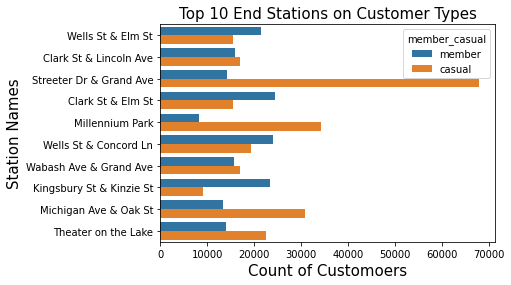

In [52]:
fig, ax = plt.subplots()

top10_end_stations = [
    "Streeter Dr & Grand Ave",
    "Michigan Ave & Oak St",
    "Wells St & Concord Ln",
    "Millennium Park",
    "Clark St & Elm St","Wells St & Elm St","Theater on the Lake","Clark St & Lincoln Ave","Wabash Ave & Grand Ave",
    "Kingsbury St & Kinzie St"
    ]

end_result = df[df['end_station_name'].isin(top10_end_stations)]

sns.countplot(data=end_result, y='end_station_name', hue='member_casual', ax=ax)

plt.title("Top 10 End Stations on Customer Types", size=15)
plt.xlabel("Count of Customoers", size=15)
plt.ylabel("Station Names", size=15)

plt.show()

In [53]:
casual_endlist = casual['end_station_name'].value_counts().head(10)
casual_endlist

Streeter Dr & Grand Ave       67936
Millennium Park               34212
Michigan Ave & Oak St         30876
Theater on the Lake           22529
Shedd Aquarium                21308
Wells St & Concord Ln         19279
Lake Shore Dr & Monroe St     18068
Lake Shore Dr & North Blvd    17282
Clark St & Lincoln Ave        17026
Wabash Ave & Grand Ave        16929
Name: end_station_name, dtype: int64

In [54]:
annual_endlist = annual['end_station_name'].value_counts().head(10)
annual_endlist

Clark St & Elm St           24560
Wells St & Concord Ln       24093
Kingsbury St & Kinzie St    23338
Wells St & Elm St           21371
Dearborn St & Erie St       20008
St. Clair St & Erie St      18596
Wells St & Huron St         18586
Broadway & Barry Ave        18274
Clinton St & Madison St     17094
Green St & Madison St       16787
Name: end_station_name, dtype: int64

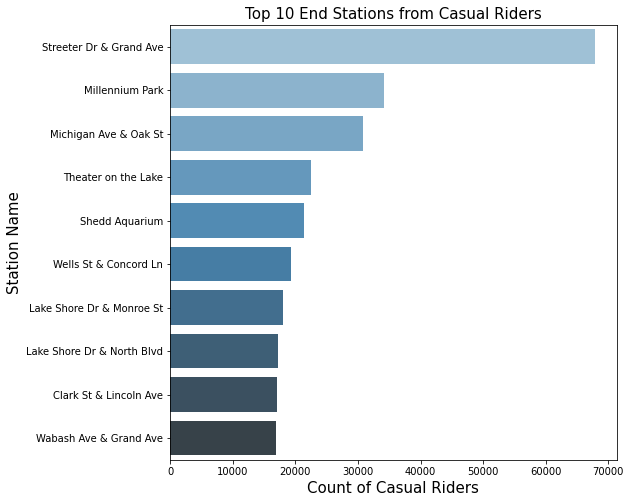

In [55]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=casual, y=casual_endlist.index, x=casual_endlist, palette='Blues_d',ax=ax)

ax.set_title('Top 10 End Stations from Casual Riders', size=15)
plt.xlabel("Count of Casual Riders", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

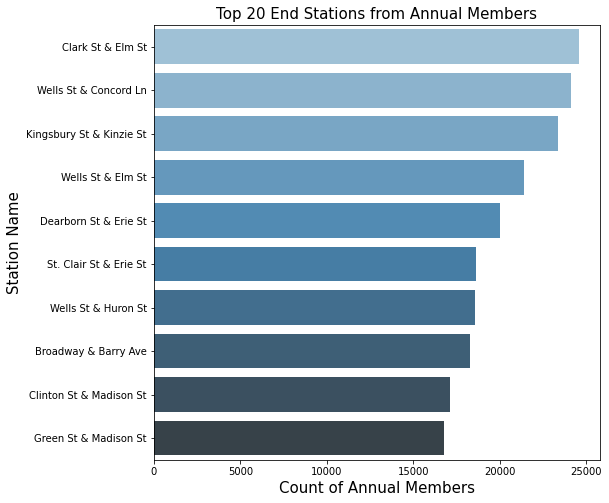

In [56]:
fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(data=annual, y=annual_endlist.index, x=annual_endlist, palette='Blues_d',ax=ax)

ax.set_title('Top 20 End Stations from Annual Members', size=15)
plt.xlabel("Count of Annual Members", size=15)
plt.ylabel("Station Name", size=15)

plt.show()

# 5.4
# Map Of Casual riders and Members.

In [57]:
df_start= df.groupby(['start_lat','start_lng','end_lat','end_lng','member_casual'],as_index=False).size().sort_values(by='size',ascending=False)
df_start_fin2 = df_start[df_start['size'] > 50]

In [58]:
fig = px.scatter_mapbox(df_start_fin2, lat="start_lat", lon="start_lng",color="member_casual", size="size",
                        height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
    mapbox=dict(
#         accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.80,
            lon=-87.61
        ),
        pitch=0,
        zoom=9
    ))

fig.show()

In [59]:
# To show how many members to casuals there are
# There are 25% more members than casual
df['member_casual'].value_counts()

member    3015410
casual    2495003
Name: member_casual, dtype: int64

# 6.Act

# 6.1 Conclusions

Analysis
Differences in behavior between Casual and Member users

On average Casual users ride at least 30 minutes whilst Member users ride between 12-14 minutes at most.

The average riding duration for Casual users is longer on Saturday and Sunday (weekends).

Findings

Although Casual users on average ride the longest time more than member users during both weekdays and even more on weekends, member users ride more constantly through out the whole week.

I could not come up with any recommendations on this stage so i went a step further by:

Checking the number of rides by user type during the week.

Confirming the average travel distance by each user type.

Number of rides taken by each customer type during the week

# 6.2 Recommendations
* A new Annual Membership package for Weekend usage only will attract current Weekend casual riders.

* Promotions aiming at current Weekday casual riders must be implemented as soon as possible. Those promtions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.

* A Loyalty Program for casual riders can be implemented, where occasional membership fees discounts must be given to casual riders with high loyalty points.